In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation, rc
from IPython.display import HTML, Image

pd.set_option('display.float_format', '{:.2g}'.format)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Let's create data that follows the following equation:

$y = \beta_1X_1 + \beta_2X_2 + \epsilon$

In [94]:
num_samples = 1000
x1 = np.random.uniform(0,1,num_samples)
x2 = np.random.uniform(0,100,num_samples)
noise = np.random.normal(0,max(x2)*.2,num_samples)

beta1 = 2e0
beta2 = 2e0

y = beta1*x1 + beta2*x2 + noise

X = np.array([x1,x2]).T

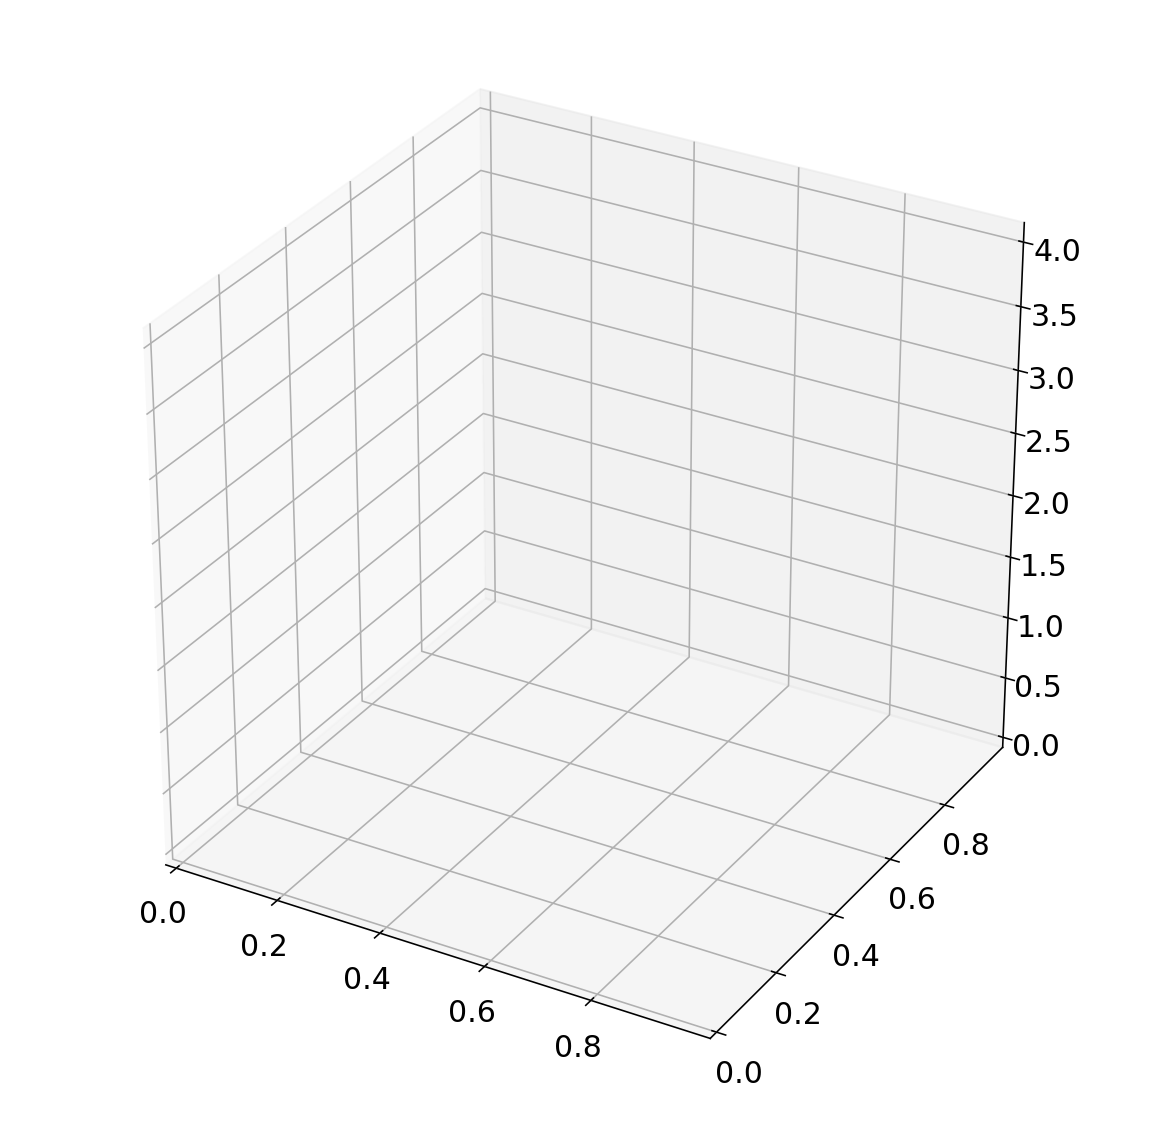

In [46]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

rc('animation', html='html5') 

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(( 0, max(x1)))
ax.set_ylim((0, max(x2)))
ax.set_zlim((0, max(y)))

line, = ax.plot([], [], [],'.' ,lw=2)

In [47]:
def init():
    line.set_data([], [])
    return (line,)

In [48]:
# animation function. This is called sequentially
def animate(i):
    line.set_data(X[:,0], X[:,1])
    line.set_3d_properties(y)
    line.axes.view_init(30,(i-1)*2+45)
    line.axes.xaxis.set_label_text('$X_1$',fontdict={'size':25,'weight':'bold'})
    line.axes.yaxis.set_label_text('$X_2$',fontdict={'size':25,'weight':'bold'})
    line.axes.zaxis.set_label_text('$Y$',fontdict={'size':25,'weight':'bold'})

    return (line,)

In [49]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=180, interval=100, blit=True)

In [50]:
anim

In [ ]:
anim.save('test.mp4')

brew install yasm

brew install ffmpeg

brew install imagemagick

In [ ]:
line.set_data?

In [ ]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

for i in range(0,360,10):
    print(i)

    ax.scatter(X[:,0], X[:,1], y,s=5,c='b');

    # color of the pane background
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    x1_t = np.linspace(min(x1),max(x1),100)
    x2_t = np.linspace(min(x2),max(x2),100)

    # add labels
    ax.set_xlabel('$X_1$',fontdict={'size':25,'weight':'bold'})
    ax.set_ylabel('$X_2$',fontdict={'size':25,'weight':'bold'})
    ax.set_zlabel('$Y$',fontdict={'size':25,'weight':'bold'});
    ax.view_init(30, i+250)
#     fig.canvas.draw()
    display.clear_output(wait=True)
    display.display(plt.gcf())


    time.sleep(.1)

In [27]:
def grad_desc(learn_rate, num_iter, beta_init):

    ## Initialization steps
    beta = beta_init
    beta_path = np.zeros((num_iter+1,2))
    beta_path[0,:]= beta_init

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(beta.T,X.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(X)/num_samples  #sum up the gradients across all observations and divide by num_samples
#         grad_vec = grad_vec
        beta = beta + learn_rate*grad_vec
        beta_path[i+1, :]=beta
    return beta_path, loss_vec

true_coef = [beta1, beta2]

In [ ]:
def stoch_grad_desc(learning_rate, num_iter, beta_init):

    ## Initialization steps
    beta = beta_init
    epochs = int(np.ceil(num_iter // len(X))) + 1
    # below are different in STOCHASTIC gradient descent
    beta_path = np.zeros((num_iter+1,2))
    beta_path[0,:] = beta_init
    loss_vec = np.zeros(num_iter)

    ## Main SGD loop
    count = 0
    for i in range(epochs):
        for j in range(num_samples):
            count+=1
            if count == num_iter+1:
                break
            y_pred = np.dot(beta.T,X.T)
            loss_vec[count-1] = np.sum((y-y_pred)**2)
            grad_vec = (y[j]-y_pred[j])*(X[j,:])
            beta = beta + learning_rate*grad_vec
            beta_path[count,:]=beta
    return beta_path, loss_vec

In [28]:
def plot_ij(beta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', color='#778899')
    ax.plot(beta_path[:, i],beta_path[:, j],
            color='k', linestyle='--', marker='^', markersize=5, markevery=50)
    ax.plot(beta_path[0, i], beta_path[0, j], marker='d', markersize=15, label='start', color='#F08080')
    ax.plot(beta_path[-1, i], beta_path[-1, j], marker='o', markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='beta'+str(i),
        ylabel='beta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')

In [90]:
def plot_all(beta_path, loss_vec, learn_rate, num_iter, beta_init, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 8))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learn_rate, iters=num_iter, initial=beta_init)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(1, 2, 1)
    plot_ij(beta_path, 0, 1, ax)
#     ax = fig.add_subplot(2, 2, 2)
#     plot_ij(beta_path, 0, 2, ax)
#     ax = fig.add_subplot(2, 2, 3)
#     plot_ij(beta_path, 1, 2, ax)
    ax = fig.add_subplot(1, 2, 2)
    ax.semilogy(loss_vec)
    print(min(loss_vec))
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)

420495.944345


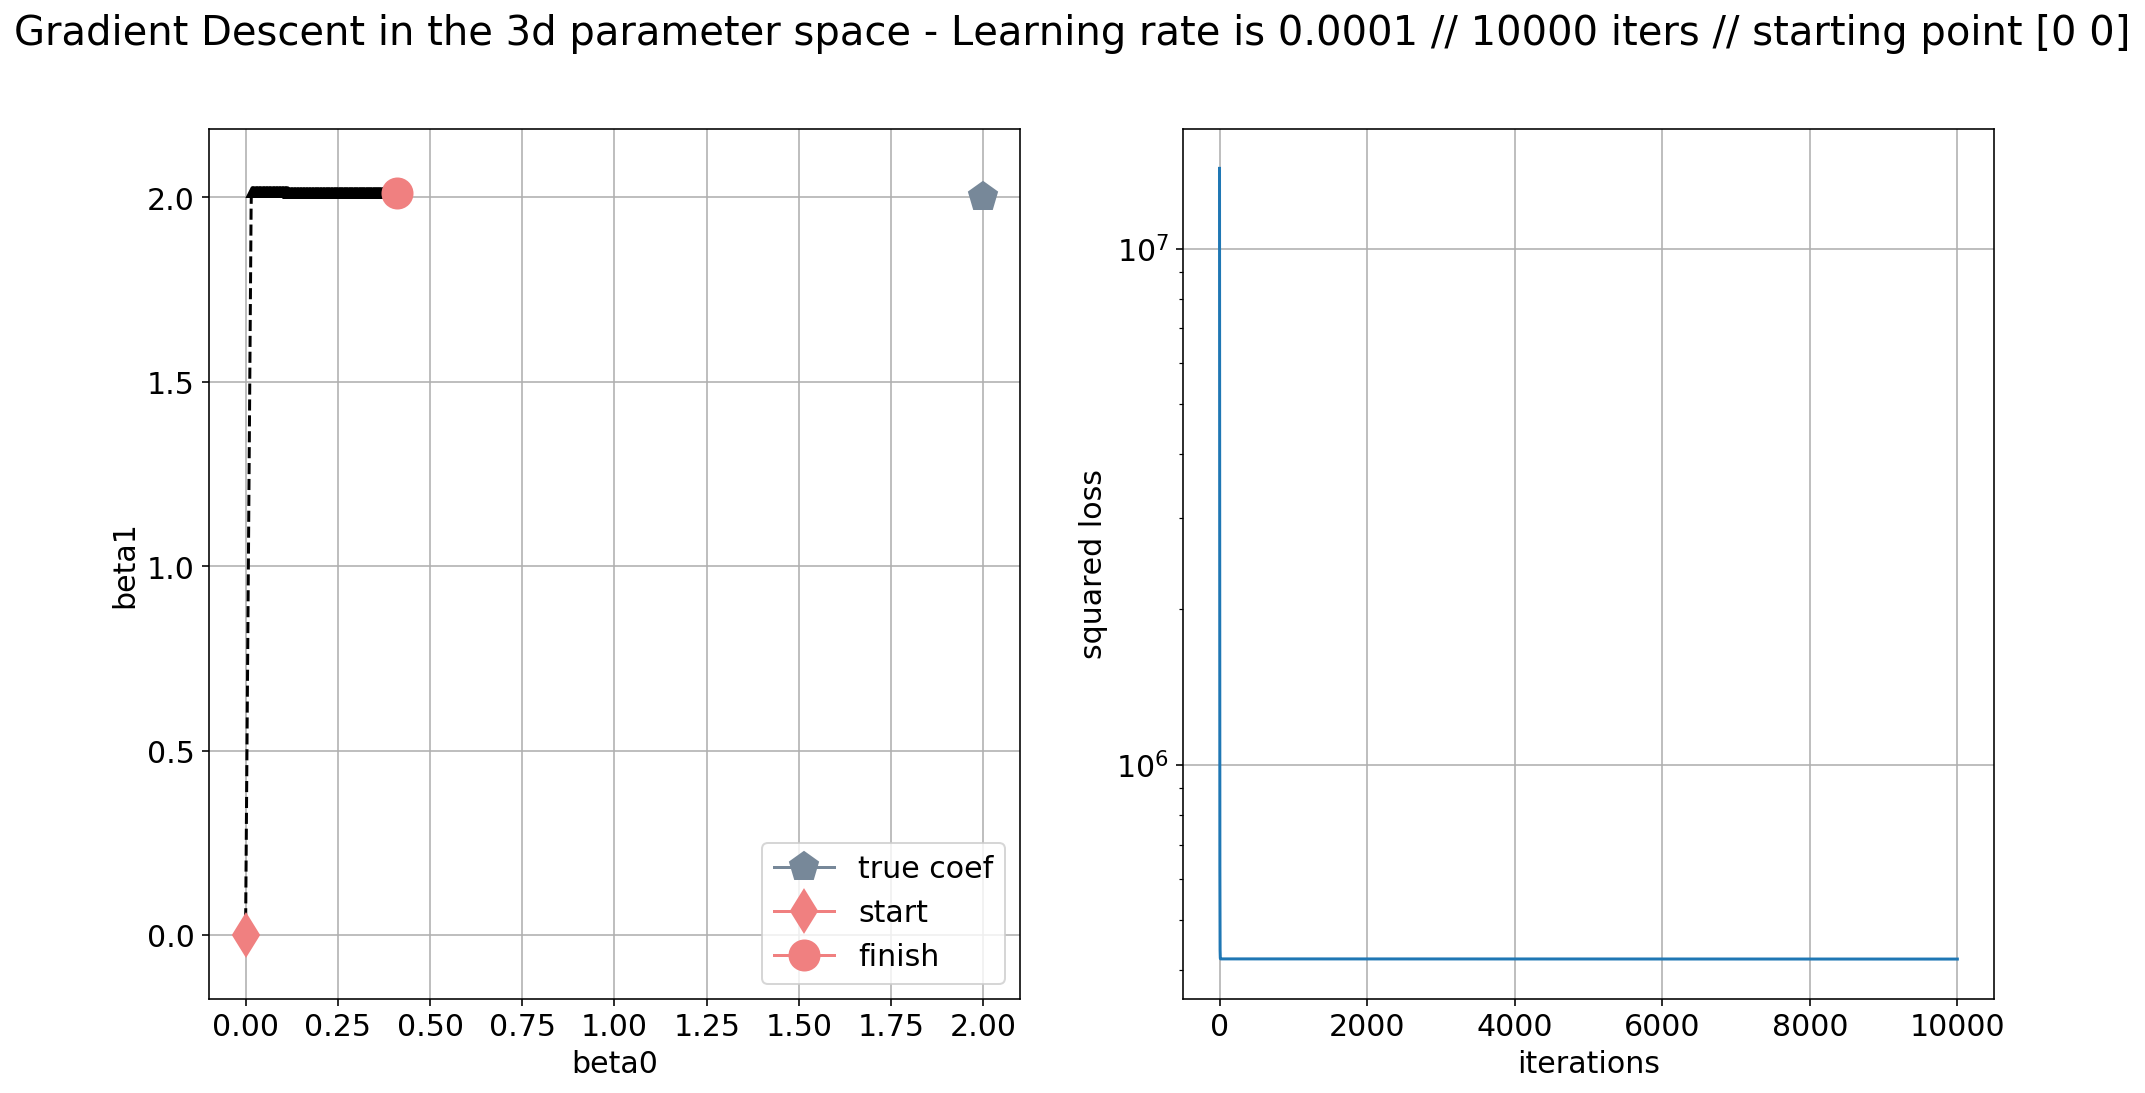

In [97]:
## Parameters to play with 

# 2.7e-4 is too big, 1e-4 is just right, 1e-5 is too small for 1e2 on both sides
# for 1e2 and 1e3
learn_rate = 1e-4#5e-4#6.1e-6#4.6e-6
num_iter = 10000
beta_init = np.array([0,0])

beta_path, loss_vec = grad_desc(learn_rate, num_iter, beta_init)
# beta_path, loss_vec = stoch_grad_desc(learn_rate, num_iter, beta_init)
    
plot_all(beta_path, loss_vec, learn_rate, num_iter, beta_init)

In [ ]:
# beta_list = np.array(betas)

In [ ]:
# plt.figure(figsize=[10,10])
# plt.plot(beta_path[:,0],beta_path[:,1])
# plt.scatter(beta_path[:,0],beta_path[:,1])
# plt.scatter(beta_path[0,0],beta_path[0,1],color='red')
# plt.scatter(beta1,beta2,color='green')

In [ ]:
from matplotlib import cm

def make_surf_plot(y, x1, x2):
    # Make data.
    res = 0.01
    X_mesh = np.arange(-1, 2*beta1+1+res, res)
    Y_mesh = np.arange(-1, 2*beta2+1+res, res)
    X_mesh, Y_mesh = np.meshgrid(X_mesh, Y_mesh)
    Z = np.zeros(X_mesh.shape)
    for i in range(X_mesh.shape[0]):
        for j in range(X_mesh.shape[1]):
            Z[i,j] = np.sum(((X_mesh[i,j]*x1 + Y_mesh[i,j]*x2)-y)**2)
    
    fig = plt.figure(figsize=[10,10])
    plt.imshow(Z,vmin=Z.min(), vmax=Z.max(),
              extent=[X_mesh.min(), X_mesh.max(), Y_mesh.min(), Y_mesh.max()],
              cmap='jet')
    plt.colorbar()
    
    plt.plot(beta_path[:,0],beta_path[:,1],c='orange',linewidth=2.0)
    plt.plot(beta_path[0,0],beta_path[0,1],color='red',marker='o', markersize=15)
    plt.plot(beta1,beta2,color='red',marker='X', markersize=15)

    ax = fig.add_subplot(111)
    ax.set_xlabel('$beta1$',fontdict={'size':25,'weight':'bold'})
    ax.set_ylabel('$beta2$',fontdict={'size':25,'weight':'bold'})


In [ ]:
make_surf_plot(y, x1, x2)